# Historical AQI Data Analysis


In [ ]:
from vayuayan import CPCBHistorical
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

## 1. Downloading Historical Data


In [2]:
# Initialize AQI client
client = CPCBHistorical()

# Download city-level data for Delhi in 2024
# Note: Uncomment the following lines to actually download data

city = "Delhi"
year = "2024"
output_file = f"{city.lower()}_aqi_{year}.csv"

df = client.download_past_year_aqi_data_city_level(city, year, output_file)
print(f"Data downloaded to {output_file}")

# Display the first few rows of the dataframe
print(df)

Data downloaded to delhi_aqi_2024.csv
  Day  January  February  March  April    May   June   July  August  \
0   1    346.0     176.0  208.0  133.0  200.0  245.0  105.0    64.0   
1   2    340.0     215.0  117.0  144.0  197.0  173.0  118.0    76.0   
2   3    341.0     199.0  126.0  167.0  264.0  155.0  108.0    68.0   
3   4    377.0     274.0  141.0  173.0  282.0  211.0   61.0    64.0   
4   5    333.0     177.0  125.0  174.0  292.0  251.0   77.0    59.0   

   September  October  November  December  
0      101.0    149.0     339.0     285.0  
1       87.0    173.0     318.0     280.0  
2       89.0    162.0     381.0     268.0  
3       69.0    184.0     380.0     178.0  
4       83.0    145.0     372.0     165.0  


## 2. Loading and Exploring the Data


In [3]:
# Load the data
df = pd.read_csv(output_file)

# For demonstration purposes, let's create sample data structure
# Uncomment the above line when you have actual data

print("Dataset Information:")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nFirst few rows:")
print(df.sample())

Dataset Information:
Shape: (31, 13)

Columns: ['Day', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

Data types:
Day            int64
January      float64
February     float64
March        float64
April        float64
May          float64
June         float64
July         float64
August       float64
September    float64
October      float64
November     float64
December     float64
dtype: object

First few rows:
    Day  January  February  March  April    May   June   July  August  \
13   14    447.0     340.0  195.0  141.0  235.0  189.0  107.0    79.0   

    September  October  November  December  
13       62.0    234.0     424.0     193.0  


## 3. Statistical Summary


In [4]:
# Statistical summary
print("AQI Statistics:")
print(df.describe())

AQI Statistics:
             Day     January    February       March       April         May  \
count  31.000000   31.000000   29.000000   31.000000   30.000000   31.000000   
mean   16.000000  354.838710  217.586207  175.903226  183.400000  224.032258   
std     9.092121   32.498304   63.680855   33.640605   30.723012   37.689507   
min     1.000000  273.000000  140.000000  117.000000  129.000000  156.000000   
25%     8.500000  336.500000  161.000000  151.000000  165.500000  192.500000   
50%    16.000000  348.000000  199.000000  178.000000  182.500000  230.000000   
75%    23.500000  368.000000  270.000000  196.000000  202.250000  244.500000   
max    31.000000  447.000000  341.000000  243.000000  240.000000  303.000000   

             June        July      August   September     October    November  \
count   30.000000   31.000000   31.000000   30.000000   31.000000   30.000000   
mean   179.133333   96.064516   72.161290  105.100000  234.000000  374.233333   
std     51.481321   

## 4. Time Series Visualization


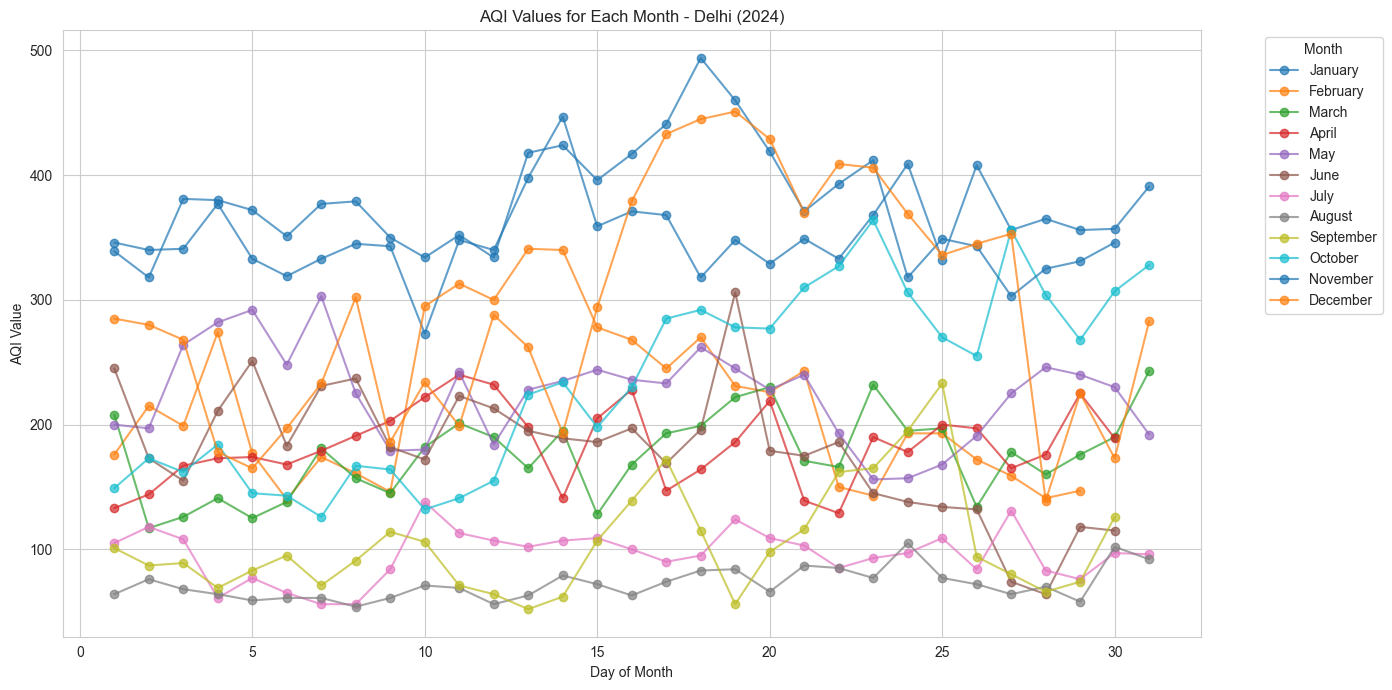

In [5]:
# Plot all months' AQI data for all days in a single graph

months = df.columns[1:]  # Exclude 'Day' column

plt.figure(figsize=(14, 7))
for month in months:
    plt.plot(df["Day"], df[month], marker="o", label=month, alpha=0.7)

plt.xlabel("Day of Month")
plt.ylabel("AQI Value")
plt.title(f"AQI Values for Each Month - {city} ({year})")
plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Plot each month's AQI data in a separate graph
# for month in months:
#     plt.figure(figsize=(10, 4))
#     plt.plot(df['Day'], df[month], marker='o', color='steelblue', alpha=0.8)
#     plt.xlabel('Day of Month')
#     plt.ylabel('AQI Value')
#     plt.title(f'AQI Values in {month} - {city} ({year})')
#     plt.grid(True, alpha=0.3)
#     plt.tight_layout()
#     plt.show()

## 5. Monthly Analysis


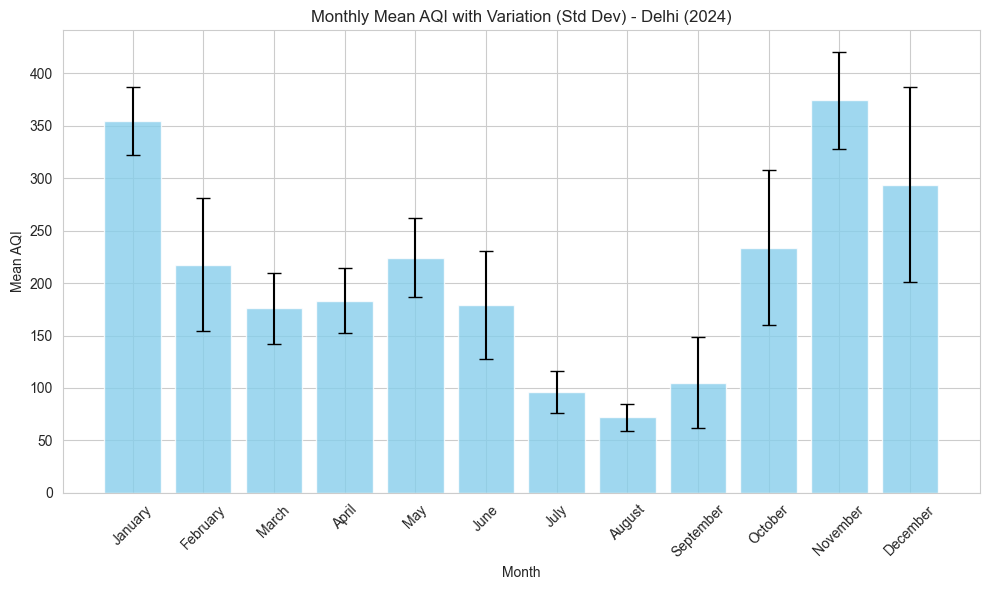

In [6]:
# Calculate mean and standard deviation of AQI for each month
aqi_means = df[months].mean()
aqi_stds = df[months].std()

# Plot mean AQI with error bars representing standard deviation
plt.figure(figsize=(10, 6))
plt.bar(months, aqi_means, yerr=aqi_stds, capsize=5, color="skyblue", alpha=0.8)
plt.ylabel("Mean AQI")
plt.xlabel("Month")
plt.title(f"Monthly Mean AQI with Variation (Std Dev) - {city} ({year})")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()